<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.DataFrame({'x':[0.1,1.3,2,2.9,3.6,5.1], 'y':[0,0,1,0,1,1]})

<AxesSubplot:xlabel='x', ylabel='y'>

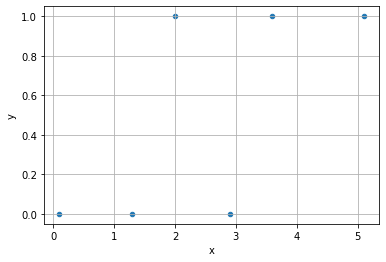

In [3]:
df.plot(x='x',y='y',kind = 'scatter',grid = True)

In [8]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.grid()
    plt.plot(x, m * x + b)
    plt.scatter(df['x'],df['y'])
    plt.xlim(-1,7)
    plt.ylim(-1, 3)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [9]:
df

,x,y
0,0.1,0
1,1.3,0
2,2.0,1
3,2.9,0
4,3.6,1
5,5.1,1


In [34]:
m,b =1,1
n=100
df['pred']=m*df['x']+b
nu = 0.1

In [35]:
for i in range(n):

    df['err'] = df['y'] - df['pred']

    df['m_change'] = df['x'] * np.sign(df['err'])
    df['b_change'] = np.sign(df['err'])

    m += nu*df['m_change'].mean()
    b += nu*df['b_change'].mean()

    df['pred'] = m * df['x'] + b

    df['err'] = df['y'] - df['pred']
    df['err_abs'] = np.abs(df['err'])
    if i % 10 == 0:
        print(df['err_abs'].mean())


2.275
0.5035555555555556
0.3471111111111111
0.3872222222222224
0.35888888888888903
0.3588888888888888
0.3588888888888886
0.3588888888888884
0.3588888888888882
0.358888888888888


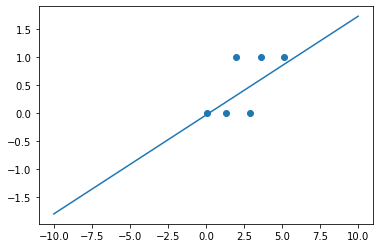

In [36]:
x = np.linspace(-10, 10, num=1000)
plt.plot(x, m * x + b)
plt.scatter(df['x'],df['y'])

In [37]:
df

,x,y,pred,err,m_change,b_change,err_abs
0,0.1,0,-0.015667,0.015667,0.1,1.0,0.015667
1,1.3,0,0.196333,-0.196333,-1.3,-1.0,0.196333
2,2.0,1,0.320000,0.680000,2.0,1.0,0.680000
3,2.9,0,0.479000,-0.479000,-2.9,-1.0,0.479000
4,3.6,1,0.602667,0.397333,3.6,1.0,0.397333
5,5.1,1,0.867667,0.132333,-5.1,-1.0,0.132333


In [38]:
m,b

(0.17666666666666603, -0.033333333333333125)

In [42]:
df['y_pred']=df['pred']>=0.196333

In [43]:
df

,x,y,pred,err,m_change,b_change,err_abs,y_pred
0,0.1,0,-0.015667,0.015667,0.1,1.0,0.015667,False
1,1.3,0,0.196333,-0.196333,-1.3,-1.0,0.196333,True
2,2.0,1,0.320000,0.680000,2.0,1.0,0.680000,True
3,2.9,0,0.479000,-0.479000,-2.9,-1.0,0.479000,True
4,3.6,1,0.602667,0.397333,3.6,1.0,0.397333,True
5,5.1,1,0.867667,0.132333,-5.1,-1.0,0.132333,True


In [31]:
from sklearn.metrics import roc_auc_score

In [33]:
roc_auc_score(df['y'],df['pred'])

0.888888888888889

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression()

In [50]:
lr.fit(df[['x']],df['y'])

LogisticRegression()

In [51]:
lr.predict(df[['x']])

array([0, 0, 0, 1, 1, 1], dtype=int64)

In [61]:
lr.predict_proba(df[['x']])[:,1]

array([0.13704651, 0.28656152, 0.40833095, 0.58055537, 0.70398089,
       0.88352048])

In [62]:
df['lr_pred']=lr.predict_proba(df[['x']])[:,1]

In [64]:
roc_auc_score(df['y'],df['lr_pred'])

0.888888888888889

In [65]:
df[['x','y','pred','lr_pred']]

,x,y,pred,lr_pred
0,0.1,0,-0.015667,0.137047
1,1.3,0,0.196333,0.286562
2,2.0,1,0.320000,0.408331
3,2.9,0,0.479000,0.580555
4,3.6,1,0.602667,0.703981
5,5.1,1,0.867667,0.883520


In [ ]:
r f m 
recency frequency monetary
как давно, как часто,  как много денег

1: 1,2,2300
    
2: 2,1,1500
    
0-1

Логистическая функция


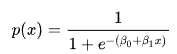

In [8]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.grid()
    plt.plot(x, 1/(1+np.exp(-(m*x+b))))
    plt.scatter(df['x'],df['y'])
    plt.xlim(-1,7)
    plt.ylim(0, 1)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…